# Clustering Data with Affinity Propagation

##### Authors: 

Michael Sarkis, Jack McCarthy

##### Github: 

https://github.com/jwmccarthy11/STA663_Project

##### Contributions:

Michael: 
    - Main affinity propagation method
- Report write-up
- Cluster plotting method

Jack:
- Optimized message functions
- Package source + build
- Basketball data example

## Abstract

Clustering data by identifying representative data points, or "Exemplars", is useful for detecting patterns and connections within the data. Standard methods for clustering generally rely on random selection followed by iterative updates, which only function if the initial selection is close to a good solution. To overcome these deficits, "Affinity Propogation" takes as an input the similarities between all pairs of points. Two types of messages are then sent between points that update the information about clusters and exemplars. "Responsibility" messages convey how suitable a point is to be another point's exemplar. "Availability" messages convery how well suited a point is to join an exemplars cluster.

## Background

For this project we are using the 2007 paper by Frey and Dueck called "<i>Clustering by Passing Messages Between Data Points</i>". This paper presents a novel clustering algorithm. It addresses the problem of efficiencey in clustering algorithms, especially amongst sparse data sets. The paper showed that a single run of affinity propogation has a lower error than even the best of many randomly initialized K-means runs, which saves on computation. 

Affinity propagation can be applied to a wide range of problems including detecting matching faces from different images, identifying representative sentences from manuscripts and idenfitying cities to serve as airline hubs. This method is also useful for very sparse data such as gene analysis and clustering.

The primary advantage of affinity propagation is its use on sparse similarity matrices. If we have reason <i>a priori</i> that certain sets of data points need not be related to others, we may ignore the processing of these pairs altogether to save on computational cost. Unfortunately, our implementation does not yet account for sparse similarity, but asymmetric similarity matrices are still valid. Another advantage is that cluster centroids, called "exemplars", are actual points in the dataset. This is more appropriate for classification tasks, such as matching faces.

Disadvantages of the affinity propagation algorithm are its speed of execution and, for some datasets, a worse mean-distance-to-centroid value than other common clustering methods. It is also unable to take a fixed number of clusters as input, though the the number of exemplars identified can be adjusted via the preference values supplied with the similarity matrix. This may be a positive in some cases where the number of clusters is unclear prior to execution.

In the future, we feel affinity propagation will be a useful tool in unsupervised learning tasks. This includes a wide range of applications from facial recognition to anomaly detection, so research involving these particular areas would benefit from investigation via AP.

## Description of Algorithm

The affinity propogation algorithm begins by taking an (n x n) matrix of pairwise similarities for all of the points in the data set. The diagonal of this matrix (the "similarity" between a point and itself) is instead taken to be the preference that the specific point is an exemplar. This diagonal is considered to be the points preferences. To begin the responsibility and availability matrices are set to n by n matrices containing only 0's. From here the algorithm iteratively performs the following steps: Updating responsibility, updating availability and updating the chosen exemplars.

The responsibility matrix at point (i,k) is updated to be the the similarity of points $i$ and $k$ minus the maxmimum of similarity plus availability that i has with any other point. To get the complete updated responsibility matrix damping is applied, such that the new responsibility matrix is equal to the old matrix times a weight plus the updated values times 1 minus that weight. The availability matrix at point (i,k), when i $\neq$ k is updated to be the the minimum of 0 and the self-responsibility of k plus the sum of all positive responsibilities that k has with other points. The availability matrix at point (k,k) is updated to be the sum of all positive responsibility that k has with other points. Again, to get the complete updated availability matrix damping is applied, such that the new availaibility matrix is equal to the old matrix times a weight plus the updated values times 1 minus that weight. The exemplars are then updated by summing the current responsibility and availability matrices and  for each row i the column k that has the greatest value represents the exemplar for i. If k = i then i iteself is deemed an exemplar.

This process continues until one of three stopping conditions is reached. The algorithm then returns the indices of the points selected as exemplars, the number of exemplars, the exemplar which each point has clustered with and optionally the iterations taken to reach these results.

To further explain affinity propagation we will break down each aspect of the algorithm:

#### Similarity Matrix
- The input s, an n by n matrix, where $s(i, k)$ is the similarity for points $i$ and $k$
    - i.e. $s(i, k) = -\Vert x_i - x_k \Vert^2$
       
- The diagonal of s, points $s(k, k)$, is the "preferences" vector
    - The larger $s(k, k)$ is more likely to be chosen as exemplar
    - Under equal prior preference for all points, the scale of shared value determines the number of clusters


#### Responsibility 
- The n by n responsibility matrix r, where $r(i, k)$ is a message sent from $i$ to $k$
     - This value represents the accumulated evidence for how well-suited point $k$ is to serve as the exemplar for point $i$
     - Takes into account all other potential exemplars for $i$
     - Initialized to a matrix of 0's
        
#### Availability 
- The n by n responsibility matrix a, where $a(i, k)$ is a message sent from $k$ to $i$
    - This value represents the accumulated evidence for how appropriate it would be for point $i$ to choose point $k$ as its exemplar.
    - Takes into account the support from other points that point $k$ should be an exemplar
    - Initialized to a matrix of 0's
        
### Algorithm Steps

1. Update responsibility:

$$r_{new}(i, k) \leftarrow s(i, k) - \underset{k' \text{s.t.} k' \neq k}{\max} \left\{ a(i, k') + s(i, k') \right\}$$

$$r_{updated} = \lambda * r_{old}+ (1-\lambda) *r_{new} $$
$$\lambda \in [0, 1]$$

    
2. Update availability for $i \neq k$:
$$a_{new}(i, k) \leftarrow \min \left\{ 0, r(k, k) + \hspace{-15px} \sum\limits_{i' \text{s.t.} i' \not\in \{i, k\}} \hspace{-10px} \max \{0, r(i', k)\} \right\}$$
    
3. Update self-availability:
    $$a_{new}(k, k) \leftarrow \hspace{-15px} \sum\limits_{i' \text{s.t.} i' \neq k} \hspace{-10px} \max \{0, r(i', k)\}$$
    $$a_{updated} = \lambda * a_{old}+ (1-\lambda) *a_{new} $$
$$\lambda \in [0, 1]$$
    
4. Assign exemplars:
      - For point $i$, the value of $k$ that maximizes $a(i, k) + r(i, k)$ 
           - If $i=k$ then this identifies $i$ as an exemplar
           - If $i \neq k$ then this identifies $k$ as the exemplar for point $i$
        
#### Stopping Conditions    
- The algorithm may terminate after any of the following conditions are met
    - A fixed iteration limit is reached
    - Changes in messages fall below a specified threshold 
    - Local decisions stay constant for a chosen number of iterations

## Optimizations Applied

Our affinity propogation algorithm is 3 seperate functions. One that updates responsibility, one that updates availability, and one function that runs the full algorithm and calls availability and responsiblity updates. Due to this set up our optimization focused almost entirely on the two update functions as the overall function needed to run through its loop sequentially and thus any there were few if any meaningful optimizations that could be applied to the main function.

To begin the first step in our optimization was to create simulated data as shown below.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from numba import njit, prange
import pandas as pd

In [2]:
np.random.seed(1234)

size = 100

# cluster 1
c1 = np.random.multivariate_normal(
    mean=np.array([0, -0.5]),
    cov=np.array([
        [0.1, 0],
        [0, 0.1]
    ]),
    size=size
)
# cluster 2
c2 = np.random.multivariate_normal(
    mean=np.array([1, -3]),
    cov=np.array([
        [0.1, 0],
        [0, 0.1]
    ]),
    size=size
)

# cluster 3
c3 = np.random.multivariate_normal(
    mean=np.array([2, 1]),
    cov=np.array([
        [0.1, 0],
        [0, 0.1]
    ]),
    size=size
)

# combined data
c = np.r_[c1, c2, c3]

# sample size
n = len(c)

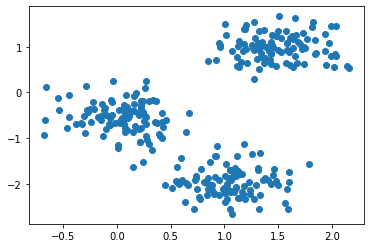

In [248]:
# separate clusters
plt.scatter(*c1.T)
plt.scatter(*c2.T)
plt.scatter(*c3.T)
plt.show()

In [4]:
# preference and similarity to be used by all functions
p = -10. * np.ones(n)
s = -distance_matrix(c, c) + np.diag(p)
a = np.zeros((n, n))
r = np.zeros_like(a)

The initialized values of the matrices above do not matter, as the functions below compute the update the same regardless of the value encountered.

### Naive Implementation
Our first iteration of the functions was to naively code them in python with standard loops for updates.

In [5]:
def update_responsibility_naive(r, s, a, lmb=0.5):
    """
    Naive responsibility matrix computation.
    """
    n = len(s)
    for i in range(n):
        for k in range(n):
            max_sum = np.max(np.delete(a[i, :] + s[i, :], k))
            r[i, k] = lmb * r[i, k] + (1 - lmb) * (s[i, k] - max_sum)
    return r

In [6]:
%timeit -r3 -n5 update_responsibility_naive(r, s, a)

831 ms ± 10.3 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)


In [7]:
def update_availability_naive(r, a, lmb=0.5):
    """
    Naive availability matrix computation.
    """
    n = len(s)
    for i in range(n):
        for k in range(n):
            if(i == k):
                a_ik = np.sum(np.maximum(0,np.delete(r[:, k], k)))
            else:
                a_ik = np.minimum(0,r[k,k]+ np.sum(np.maximum(0,np.delete(r[:, k], (i,k)))))
            a[i, k] = lmb * a[i, k] + (1 - lmb) * (a_ik)
    return a

In [8]:
%timeit -r3 -n5 update_availability_naive(r, a)

1.57 s ± 9.74 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)


### Numba Parallelization
We optimized from here by then using numba to paralellize the loops, which created a rather large speed up.

In [9]:
@njit(parallel=True)
def update_responsibility_numba(r, s, a, lmb=0.5):
    """Numba responsibility matrix computation.
    """
    n = len(s)
    for i in prange(n):
        for k in prange(n):
            max_sum = np.max(np.delete(a[i, :] + s[i, :], k))
            r[i, k] = lmb * r[i, k] + (1 - lmb) * (s[i, k] - max_sum)
    return r

In [10]:
%timeit -r3 -n5 update_responsibility_numba(r, s, a) 

The slowest run took 22.08 times longer than the fastest. This could mean that an intermediate result is being cached.
132 ms ± 163 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)


In [11]:
@njit(parallel=True)
def update_availability_numba(r, a, lmb=0.5):
    """
    Naive availability matrix computation.
    """
    n = len(r)
    for i in prange(n):
        for k in prange(n):
            if i == k:
                a_ik = np.sum(np.maximum(0,np.delete(r[:, k], k)))
            elif i < k:
                vec= np.delete(r[:, k], k)
                sum_vec = np.delete(vec,i)
                a_ik = np.minimum(0,r[k,k]+ np.sum(np.maximum(0,sum_vec)))
            else:
                vec= np.delete(r[:, k], i)
                sum_vec = np.delete(vec,k)
                a_ik = np.minimum(0,r[k,k]+ np.sum(np.maximum(0,sum_vec)))
            a[i, k] = lmb * a[i, k] + (1 - lmb) * (a_ik)
    return a

In [12]:
%timeit -r3 -n5 update_availability_numba(r, a) 

The slowest run took 17.42 times longer than the fastest. This could mean that an intermediate result is being cached.
208 ms ± 248 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)


### Numpy and Vectors
To increase efficiency we removed the loops used and calculated updates through a series of numpy functions and vector operations.

In [13]:
def update_responsibility_numpy(r, s, a, lmb=0.5):
    """
    Numpy optimized responsibility matrix computation.
    """
    n = len(s)
    i = np.arange(n)
    temp = np.add(a, s)
    
    # indices of two largest row vals
    idx = np.argpartition(temp, -2)[:, [-1, -2]]
    idx_1 = idx[:, 0]
    idx_2 = idx[:, 1]
    
    # two largest row vals
    max_1 = temp[i, idx_1]
    max_2 = temp[i, idx_2]
    
    # compute responsibility
    np.subtract(s, max_1[:, None], temp)
    temp[i, idx_1] = s[i, idx_1] - max_2
    
    return r * lmb + (1-lmb) * temp

In [14]:
%timeit -r3 -n5 update_responsibility_numpy(r, s, a)

1.58 ms ± 29.2 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)


In [15]:
def update_availability_numpy(r, a, lmb=0.5):
    """Numpy optimized availability matrix computation.
    """
    n = len(r)
    temp = np.zeros((n, n))
    max_r = np.maximum(r, 0)
    
    # set diag to r's diag to account for r(k, k) in sum
    np.fill_diagonal(max_r, np.diag(r))
    
    # removes i'=i from col sum
    max_r = np.subtract(np.sum(max_r, axis=0), max_r)
    temp = np.minimum(max_r, 0)
    
    # fill diag w/ self-availability
    np.fill_diagonal(temp, np.diag(max_r))
    
    return a * lmb + (1-lmb) * temp

In [16]:
%timeit -r3 -n5 update_availability_numpy(r, a) 

1.8 ms ± 244 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)


### Cython
Finally our best optimizations involved converting the method to a cython based code. We import these functions from the package we constructed. It is worth noting that the higher the sample size, the less difference there is in the execution time between the Cython implementation and the numpy implementation.

In [17]:
from aff_prop.aff_prop import resp_dense, aval_dense

In [18]:
%timeit -r3 -n5 resp_dense(r, s, a)

The slowest run took 5.75 times longer than the fastest. This could mean that an intermediate result is being cached.
513 µs ± 386 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)


In [19]:
%timeit -r3 -n5 aval_dense(r, a)

276 µs ± 65 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)


### Optimization Summary
Below is the summary of all iterations of our optimization process and the time each took to execute. It shows a substantial speed up with each optimiziation we implemented.

#### Responsibility Timing

In [20]:
a = np.zeros((n, n))
r = np.zeros_like(a)

#naive implementation
naive_r = %timeit -o -r3 -n5 update_responsibility_naive(r, s, a)


#numba implementation
numba_r = %timeit -o -r3 -n5 update_responsibility_numba(r, s, a)


#numpy implementation
numpy_r = %timeit -o -r3 -n5 update_responsibility_numpy(r, s, a)


#cython implementation
cython_r = %timeit -o -r3 -n5 resp_dense(r, s, a)

833 ms ± 1.04 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
17.4 ms ± 620 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)
817 µs ± 164 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)
261 µs ± 18.6 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)


In [21]:
# get runtimes
base = naive_r.average
mult_base = base / base
mult_nb = base / numba_r.average
mult_np = base / numpy_r.average
mult_cs = base / cython_r.average

# create dataframe
col1 = {'Speedup': [mult_base, mult_nb, mult_np, mult_cs],
        'Average Runtime (s)': [base, numba_r.average, numpy_r.average, cython_r.average]}
multipliers = pd.DataFrame(
    col1,index=['Base Python', 'Numba', 'Numpy','Cython']
)
multipliers.round(4)
multipliers.Speedup = multipliers.Speedup.apply(lambda x: str(int(x))+'x')
multipliers

,Speedup,Average Runtime (s)
Base Python,1x,0.832862
Numba,47x,0.017386
Numpy,1019x,0.000817
Cython,3193x,0.000261


#### Availability Timing

In [22]:
# naive implementation
naive_a = %timeit -o -r3 -n5 update_availability_naive(r, a)


# numba implementation
numba_a = %timeit -o -r3 -n5 update_availability_numba(r, a)


# numpy implementation
numpy_a = %timeit -o -r3 -n5 update_availability_numpy(r, a)


# cython implementation
cython_a = %timeit -o -r3 -n5 aval_dense(r, a)

1.56 s ± 4.18 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
34.1 ms ± 957 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)
2.23 ms ± 140 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)
423 µs ± 55.8 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)


In [23]:
# get runtimes
base = naive_a.average
mult_base = base / base
mult_nb = base / numba_a.average
mult_np = base / numpy_a.average
mult_cs = base / cython_a.average

# create dataframe
col1 = {'Speedup': [mult_base, mult_nb, mult_np, mult_cs],
        'Average Runtime (s)': [base, numba_a.average, numpy_a.average, cython_a.average]}
multipliers = pd.DataFrame(
    col1,index=['Base Python', 'Numba', 'Numpy','Cython']
)
multipliers.round(4)
multipliers.Speedup = multipliers.Speedup.apply(lambda x: str(int(x))+'x')
multipliers

,Speedup,Average Runtime (s)
Base Python,1x,1.559810
Numba,45x,0.034113
Numpy,700x,0.002226
Cython,3688x,0.000423


## Simulated Data Examples

In [24]:
from aff_prop.aff_prop import affinity_propagation, plot_affinity_clusters

In [94]:
np.random.seed(1234)
size = 100

# cluster 1
c1 = np.random.multivariate_normal(
    mean=np.array([0, -0.5]),
    cov=np.array([
        [0.1, 0],
        [0, 0.1]
    ]),
    size=size
)
# cluster 2
c2 = np.random.multivariate_normal(
    mean=np.array([1, -2]),
    cov=np.array([
        [0.1, 0],
        [0, 0.1]
    ]),
    size=size
)

# cluster 3
c3 = np.random.multivariate_normal(
    mean=np.array([1.5, 1]),
    cov=np.array([
        [0.1, 0],
        [0, 0.1]
    ]),
    size=size
)

# combined data
c = np.r_[c1, c2, c3]

# sample size
n = len(c)

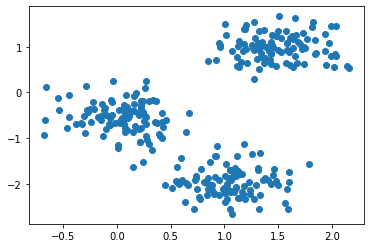

In [247]:
# separate clusters
plt.scatter(*c.T)
plt.show()

In [102]:
# preference and similarity to be used by all functions
p = -12.5 * np.ones(n)
s = -distance_matrix(c, c) + np.diag(p)

In [103]:
k, exems, labels, _, _ = affinity_propagation(s)

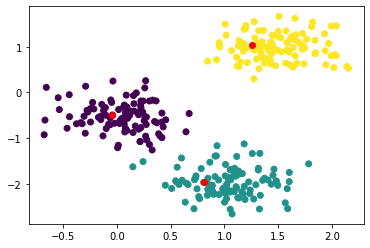

In [104]:
plot_affinity_clusters(c,exems,labels)

## Real Data Examples

We will now perform clustering analysis on college basketball data with our implementation of affinity propagation as well as k-means and k-nearest neighbors clustering methods.

In [237]:
import pickle
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.neighbors import NearestCentroid

In [106]:
# read data
df_col_stats = pd.read_pickle("./data/college_stats.pkl")

# get latest season played
df_col_stats.reset_index(['season'], inplace=True)
df_col_stats = df_col_stats.groupby(level=0).last()
df_col_stats.head()

,season,school,conf,g,gs,mp,fg,fga,fg%,2p,...,blk%,tov%,usg%,ows,dws,ws,ws_40,obpm,dbpm,bpm
id,,,,,,,,,,,,,,,,,,,,,
achiupr01,2019-20,Memphis,AAC,31,31,30.4,5.9,11.9,0.493,5.5,...,6.5,16.2,28.3,0.9,1.5,2.3,0.160,NaN,NaN,NaN
ackeral01,2004-05,Pepperdine,WCC,31,31,37.2,5.9,13.1,0.45,4.0,...,0.9,15.2,22.2,2.5,1.5,4.0,0.140,NaN,NaN,NaN
acyqu01,2011-12,Baylor,Big 12,38,38,29.7,4.2,7.2,0.577,4.1,...,5.9,17.5,18.9,1.7,0.7,2.4,0.175,NaN,NaN,NaN
adamsha01,2005-06,Arizona,Pac-10,31,30,33.3,7.5,15.8,0.478,7.0,...,1.0,11.4,28.2,1.2,2.6,3.9,0.150,NaN,NaN,NaN
adamsja01,2017-18,St. Bonaventure,A-10,28,27,37.0,5.5,12.5,0.437,2.8,...,0.9,15.9,25.9,2.6,0.7,3.3,0.196,NaN,NaN,NaN


In [107]:
# grab stats on which to cluster
df_box_score = df_col_stats.loc[:, 'fg':'pts'].fillna(0.).apply(pd.to_numeric)
df_box_score.head()

,fg,fga,fg%,2p,2pa,2p%,3p,3pa,3p%,ft,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
id,,,,,,,,,,,,,,,,,,,,,
achiupr01,5.9,11.9,0.493,5.5,10.6,0.514,0.4,1.3,0.325,3.6,...,0.599,3.0,7.8,10.8,1.0,1.1,1.9,2.8,2.4,15.8
ackeral01,5.9,13.1,0.450,4.0,8.7,0.459,1.9,4.4,0.431,2.9,...,0.858,1.4,5.1,6.5,3.7,1.3,0.5,2.6,1.9,16.6
acyqu01,4.2,7.2,0.577,4.1,7.1,0.576,0.1,0.1,0.600,3.6,...,0.782,2.6,4.8,7.4,1.0,0.9,1.8,1.9,3.1,12.0
adamsha01,7.5,15.8,0.478,7.0,13.7,0.511,0.5,2.1,0.262,1.9,...,0.611,2.2,2.8,5.0,2.9,2.6,0.5,2.2,1.9,17.5
adamsja01,5.5,12.5,0.437,2.8,6.4,0.438,2.7,6.1,0.436,5.5,...,0.851,0.4,3.0,3.4,5.2,1.5,0.3,3.1,2.9,19.1


In [108]:
np_box_score = df_box_score.to_numpy()

In [205]:
# sample size
n = len(np_box_score)

# negative squared error as similarity metric
s = -distance_matrix(np_box_score, np_box_score)

# equal preferences
p = np.ones(n) * -150
np.fill_diagonal(s, p)

# perform clustering
k, ex, lbl, _, i = affinity_propagation(s)

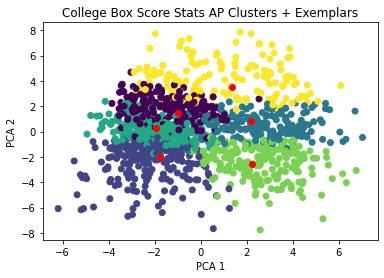

In [228]:
plot_affinity_clusters(np_box_score, ex, lbl, pca_axes=True)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('College Box Score Stats AP Clusters + Exemplars')
plt.show()

In [229]:
%timeit affinity_propagation(s)

2.16 s ± 54.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


The players that represent each exemplar are shown in the table below.

In [207]:
# table of exemplars
df_box_score.iloc[ex]

,fg,fga,fg%,2p,2pa,2p%,3p,3pa,3p%,ft,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
id,,,,,,,,,,,,,,,,,,,,,
hillso01,4.5,9.9,0.458,2.9,5.7,0.508,1.6,4.2,0.390,2.7,...,0.766,1.7,3.6,5.3,2.7,1.1,0.6,2.2,2.2,13.4
johnsor01,6.7,14.8,0.451,4.4,9.5,0.464,2.3,5.3,0.427,4.1,...,0.698,1.7,4.1,5.8,2.9,1.1,0.7,2.5,1.8,19.7
joneste01,4.7,9.3,0.500,4.2,8.0,0.528,0.4,1.3,0.327,2.6,...,0.627,2.5,4.6,7.2,1.3,1.3,1.8,1.6,2.4,12.3
kinseta01,5.5,12.1,0.453,3.6,7.2,0.507,1.9,5.0,0.376,3.0,...,0.843,1.4,3.2,4.6,2.3,1.6,0.3,2.1,2.2,15.8
martija01,6.1,12.0,0.509,5.7,10.5,0.545,0.4,1.6,0.269,4.2,...,0.690,3.0,6.3,9.2,1.8,1.2,0.7,2.8,2.8,16.9
toscaju01,3.1,6.4,0.490,2.6,4.9,0.533,0.5,1.5,0.348,1.5,...,0.553,2.2,3.5,5.7,1.7,1.1,0.4,2.1,2.5,8.3


## Comparative Analysis

#### Affinity Propagation

In [245]:
np_exemplars = np_box_score[ex]
abs_dist = 0
sq_dist = 0

for l, x in zip(lbl, np_box_score):
    abs_dist += np.sum(np.abs(x-np_exemplars[l]))
    sq_dist += np.sum(np.square(x-np_exemplars[l]))
    
abs_dist /= n
sq_dist /= n

print('Affinity Prop. Error Measures:\n')
print('Mean absolute error:', np.round(abs_dist, 3))
print('Mean squared error: ', np.round(sq_dist, 3))

Affinity Prop. Error Measures:

Mean absolute error: 14.555
Mean squared error:  23.167


#### K-means

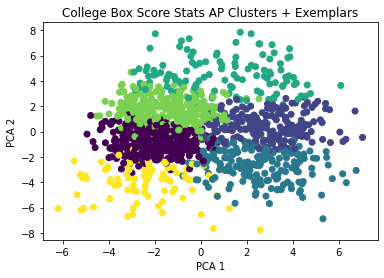

In [236]:
kmeans = KMeans(n_clusters=6).fit(np_box_score)
labels = kmeans.labels_
center = kmeans.cluster_centers_
plot_affinity_clusters(np_box_score, [], labels, pca_axes=True)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('College Box Score Stats AP Clusters + Exemplars')
plt.show()

In [243]:
abs_dist = 0
sq_dist = 0

for l, x in zip(labels, np_box_score):
    abs_dist += np.sum(np.abs(x-center[l]))
    sq_dist += np.sum(np.square(x-center[l]))
   
abs_dist /= n
sq_dist /= n

print('KMeans Error Measures:\n')
print('Mean absolute error:', np.round(abs_dist, 3))
print('Mean squared error: ', np.round(sq_dist, 3))

KMeans Error Measures:

Mean absolute error: 13.742
Mean squared error:  20.053


#### Agglomerative Clustering

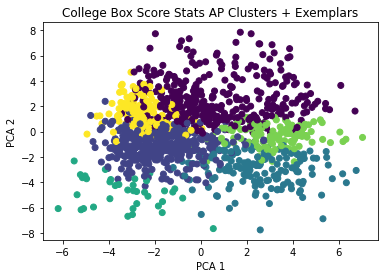

In [235]:
labels = AgglomerativeClustering(n_clusters=6).fit_predict(np_box_score)
plot_affinity_clusters(np_box_score, [], labels, pca_axes=True)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('College Box Score Stats AP Clusters + Exemplars')
plt.show()

In [242]:
# obtain agglomerative centroids
clf = NearestCentroid()
clf.fit(np_box_score, labels)
center = clf.centroids_

abs_dist = 0
sq_dist = 0

for l, x in zip(labels, np_box_score):
    abs_dist += np.sum(np.abs(x-center[l]))
    sq_dist += np.sum(np.square(x-center[l]))
   
abs_dist /= n
sq_dist /= n

print('Agglomerative Error Measures:\n')
print('Mean absolute error:', np.round(abs_dist, 3))
print('Mean squared error: ', np.round(sq_dist, 3))

Agglomerative Error Measures:

Mean absolute error: 13.742
Mean squared error:  20.053


As can be seen from the error measures displayed above, affinity propagation tends to do slightly worse than other conventional methods in pure clustering tasks with regard to mean-distance-to-centroid metrics. This is likely due to the fact that the centroids generated by other clustering methods need not be actual data points, so they have greater freedom to attain values that minimize error metrics. However, in other cases, such as with the sparse genetics dataset clustered in the original paper, these metrics may sometimes fall heavily in affinity propagation's favor. The speed of execution is also slightly worse than that of the two clustering algorithms used above, though an implementation that allows for sparse similarity would show a speedup proportional to the sparsity of the similarity matrix that is supplied.

## Installation Instructions

This package, dubbed <a href="https://test.pypi.org/project/aff-prop/">"aff_prop"</a>, is available on the TestPyPi platform for installation via pip. To install...
1. Ensure <a href="https://visualstudio.microsoft.com/visual-cpp-build-tools/">C++ Build Tools 14</a> or greater is installed on your system.


2. Run the following command in your terminal: 

        pip install -i https://test.pypi.org/simple/ --extra-index-url https://pypi.org/simple/ aff-prop
    
    
3. Import via the following line:

        from aff_prop.aff_prop import affinity_propagation
        
    
4. The plotting function may also be imported via:


        from aff_prop.aff_prop import plot_affinity_clusters

## Conclusion

We find affinity propagation to be a highly interesting algorithm due to its algorithmic simplicity and its apparent effectiveness in clustering many types of data. It is highly applicable to any dataset for which a similarity matrix can be defined for pairs of data points, which is not a small subset of all possible datasets. Problem domains in which this algorithm may be useful are those involving unsupervised learning or classification due to the way it concretely relates data points to each other. Examples of these tasks are face identification and unsupervised detection of optimal transport hubs. The algorithm is limited by computational power for dense similarity, though an implementation accounting for sparse similarity would provide significant speed improvements without loss of clustering capabilities (supposing the ignored data point pairs were not as irrelevant as specified by the user). As such, an immense improvement on our current implementation would be to allow for sparse similarity. Another limitiation is the extreme sensitivity of the clustering output to the preferences specified prior to execution.

## References

Frey, Dueck (2007) <i>Clustering by Passing Messages Between Data Points</i>

Sports Reference LLC Basketball-Reference.com - Basketball Statistics and History. https://www.basketball-reference.com/. 2021